<a href="https://colab.research.google.com/github/Bani-Talebi/Electricity-Price-Forecasting/blob/master/DA_Load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib

In [ ]:
up=files.upload()

Saving Load.csv to Load.csv


In [ ]:
df=pd.read_csv('Load.csv')
df.index=pd.date_range(start='01-01-2015',periods=len(df),freq='H')
df.drop(columns='time',inplace=True)
df.dropna(inplace=True)
df.head()

,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density,Ontario Demand
2015-01-01 00:00:00,0.0106,-7.234,0.0,0.0,0.0106,2.8822,0.9042,1.3015,14960
2015-01-01 01:00:00,0.0087,-7.308,0.0,0.0,0.0087,2.8862,0.8513,1.3005,14476
2015-01-01 02:00:00,0.0083,-7.518,0.0,0.0,0.0083,2.8897,0.8154,1.3004,13979
2015-01-01 03:00:00,0.0095,-7.774,0.0,0.0,0.0095,2.8943,0.7639,1.3009,13670
2015-01-01 04:00:00,0.0103,-7.918,0.0,0.0,0.0103,2.9005,0.7003,1.3010,13567


Text(0.5, 1.0, 'Ontario Electricity Demand vs Weather Temperature')

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


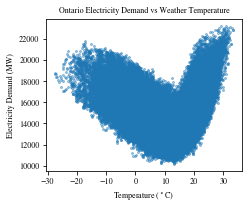

In [ ]:
plt.figure(figsize=(3.5,2.8))
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['font.size']=8
plt.rcParams['figure.autolayout']=True
plt.rcParams['axes.titlesize']=8
plt.rcParams['axes.labelsize']=8
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=2
plt.rcParams['legend.fontsize']=8
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.fontset']='custom'
plt.rcParams['legend.numpoints']=1
plt.scatter(df['temperature'],df['Ontario Demand'],alpha=0.4)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Electricity Demand (MW)')
plt.title('Ontario Electricity Demand vs Weather Temperature')
#plt.savefig('Temperature.png',dpi=300)
#dl=files.download('Temperature.png')

In [ ]:
y=df['Ontario Demand']['01-01-2015':'31-01-2015']
y=df['Ontario Demand']['01-01-2015':'31-01-2015'].values.reshape(31,24)

Text(0, 0.5, 'Days')

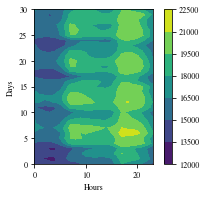

In [ ]:
fig, ax = plt.subplots(figsize=(3.5,2.8))


ax.set_aspect('equal')
cf = ax.contourf(y)
fig.colorbar(cf, ax=ax)
ax.set_xlabel('Hours')
ax.set_ylabel('Days')
#plt.savefig('WeekDayLoad.pdf',dpi=300)
#dl=files.download('WeekDayLoad.pdf')

Text(0, 0.5, 'Electricity Demand (MW)')

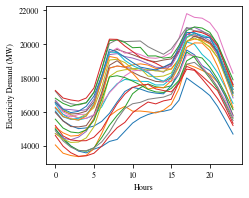

In [ ]:
fig, ax = plt.subplots(figsize=(3.5,2.8))

x=np.arange(24)
for i in range(24):
  plt.plot(x,y[i,:])

plt.xlabel('Hours')
plt.ylabel('Electricity Demand (MW)')

#plt.savefig('HourlyLoad.png',dpi=300)
#dl=files.download('HourlyLoad.png')

In [ ]:
def plot_average_prices(data):
    
    """Plot monthly, daily and hourly averages of input data."""
    
    fig = plt.figure(figsize=(3.5,2.8))
    #fig = plt.figure()
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)

    data.groupby(data.index.month).mean().plot.bar(ax=ax1)
    #ax1.set_title('Monthly Average')
    ax1.set_ylabel('Load (MW)')
    ax1.set_xlabel('Month of the year')
    data.groupby(data.index.dayofweek).mean().plot.bar(ax=ax2)
    #ax2.set_title('Weekly Average')
    ax2.set_ylabel('Load (MW)')
    ax2.set_xlabel('Day of the week')
    data.groupby(data.index.hour).mean().plot.bar(ax=ax3)
    #ax3.set_title('Hourly Average')
    ax3.set_ylabel('Load (MW)')
    ax3.set_xlabel('Hour of the day')
    matplotlib.rc('axes',edgecolor='black')

    #plt.savefig('TimeLoad.png',dpi=300)
    #files.download('TimeLoad.png')

In [ ]:
up=files.upload()

Saving Demand.csv to Demand.csv


In [ ]:
DF=pd.read_csv('Demand.csv')
DF.index=pd.date_range(start='01-01-2010',periods=len(DF),freq='H')
DF.drop(columns=['Date','Hour','Market Demand'],inplace=True)
DF.head()


,Ontario Demand
2010-01-01 00:00:00,14403
2010-01-01 01:00:00,13814
2010-01-01 02:00:00,13366
2010-01-01 03:00:00,13120
2010-01-01 04:00:00,13075


In [ ]:
YY=DF['2015':]
DF.describe()


,Ontario Demand
count,87648.000000
mean,15791.854281
std,2397.117051
min,10167.000000
25%,14017.000000
50%,15757.000000
75%,17387.000000
max,25450.000000


Time and Date Effect

Before actually preprocessing the data, let's have a quick look at the general distribution of the data, especially with respect to any patterns that are identifiable with pure visualization. Followings are the plots of average price for all months, weekdays and hours in the dataset.

It seems that electricity price has some very obvious temporal patterns. Electricity is cheaper in summer than in winter. While electricity costs most during workdays, it drops towards the weekend with lowest prices on Sunday. Over the course of a day, electricity is cheapest after midnight, peaks in the morning and evening hours and is a little lower during working hours. Those are very superficial analyses of temporal patterns, but it is obvious that there are some patterns available, that we should be able to extract from the data.

In the next steps, I will preprocess the data for training. Since we need real, unprocessed data as a sufficient baseline for evaluating the model performance, I keep an untouched copy of data (all prices of 2019) as a test set for evaluation purposes

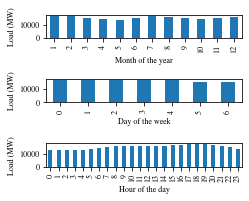

In [ ]:
plot_average_prices(DF['Ontario Demand'])

In [ ]:
# keep raw data of the test set for model evaluation
test_raw = DF['2019']

The range of the prices now looks much more appropriate to be scaled to 0-1 values. When scaling, the data will now be much more spread out instead of concentrating around some median value, as it would have been the case when the outliers would not have been removed. The histogram below shows the distribution of prices for which outliers have been replaced.

Text(0.5, 0, 'Electricity Demand (MW)')

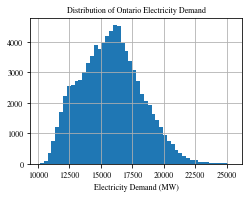

In [ ]:
f, ax = plt.subplots(figsize=(3.5,2.8))
DF['Ontario Demand'].hist(bins=50, ax=ax)
ax.set_title('Distribution of Ontario Electricity Demand')
ax.set_xlabel('Electricity Demand (MW)')
#plt.savefig('HistLoad.pdf',dpi=300)
#files.download('HistLoad.pdf')

In [ ]:
# scale data to range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
da_scaler = MinMaxScaler()
DF['Ontario Demand'] = da_scaler.fit_transform(DF['Ontario Demand'].values.reshape(-1, 1))

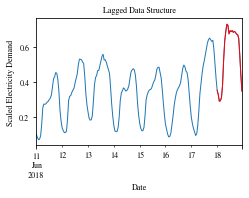

In [ ]:
feature_data = DF.loc['2018-06-11':'2018-06-18', 'Ontario Demand']
feature_data.columns = ['input data']
label_data = DF.loc['2018-06-18', 'Ontario Demand']
label_data.columns = ['data to predict']
f, ax = plt.subplots(figsize=(3.5,2.8))
feature_data.plot(ax=ax)
label_data.plot(ax=ax, color='red')
ax.set_ylabel('Scaled Electricity Demand')
ax.set_xlabel('Date')
ax.set_title('Lagged Data Structure');
#plt.savefig('LaggedLoad.png',dpi=300)
#files.download('LaggedLoad.png')

In order to achieve that structure the data has to be 'lagged'. This can be achieved by adding columns to every row of the input data, one column for each lagged value. In order to use the last week hourly price data, we have to lag for 7x24=168 hours.

In [ ]:
# include time lags of timeseries data for 1 week = 7 * 24h = 168h
lags = 168
for l in range(1, lags+1):
    DF['l_{}'.format(l)] = DF['Ontario Demand'].shift(l)
# drop missing data entries that result from the lagging step (no lagged data available for first 168 days of year)
DF.dropna(inplace=True)
DF.head(n=5)

,Ontario Demand,l_1,l_2,l_3,l_4,l_5,l_6,l_7,l_8,l_9,l_10,l_11,l_12,l_13,l_14,l_15,l_16,l_17,l_18,l_19,l_20,l_21,l_22,l_23,l_24,l_25,l_26,l_27,l_28,l_29,l_30,l_31,l_32,l_33,l_34,l_35,l_36,l_37,l_38,l_39,...,l_129,l_130,l_131,l_132,l_133,l_134,l_135,l_136,l_137,l_138,l_139,l_140,l_141,l_142,l_143,l_144,l_145,l_146,l_147,l_148,l_149,l_150,l_151,l_152,l_153,l_154,l_155,l_156,l_157,l_158,l_159,l_160,l_161,l_162,l_163,l_164,l_165,l_166,l_167,l_168
2010-01-08 00:00:00,0.376758,0.441144,0.533534,0.613950,0.664202,0.693974,0.723549,0.713931,0.637506,0.584178,0.576130,0.588562,0.598574,0.615455,0.616567,0.610548,0.611006,0.573055,0.467447,0.383760,0.336518,0.318720,0.328142,0.338677,0.372636,0.438396,0.536282,0.612903,0.669764,0.706864,0.741870,0.747366,0.663221,0.608781,0.597134,0.600602,0.607669,0.620559,0.625204,0.625597,...,0.487666,0.485180,0.491003,0.496827,0.491592,0.475299,0.441209,0.396519,0.356540,0.319440,0.284499,0.259242,0.261336,0.259504,0.271871,0.299549,0.345678,0.395276,0.436040,0.468429,0.483217,0.506969,0.504090,0.432703,0.378329,0.365112,0.359354,0.355428,0.340116,0.306942,0.268665,0.238631,0.231041,0.220310,0.200680,0.190277,0.193221,0.209318,0.238631,0.277171
2010-01-08 01:00:00,0.350258,0.376758,0.441144,0.533534,0.613950,0.664202,0.693974,0.723549,0.713931,0.637506,0.584178,0.576130,0.588562,0.598574,0.615455,0.616567,0.610548,0.611006,0.573055,0.467447,0.383760,0.336518,0.318720,0.328142,0.338677,0.372636,0.438396,0.536282,0.612903,0.669764,0.706864,0.741870,0.747366,0.663221,0.608781,0.597134,0.600602,0.607669,0.620559,0.625204,...,0.548387,0.487666,0.485180,0.491003,0.496827,0.491592,0.475299,0.441209,0.396519,0.356540,0.319440,0.284499,0.259242,0.261336,0.259504,0.271871,0.299549,0.345678,0.395276,0.436040,0.468429,0.483217,0.506969,0.504090,0.432703,0.378329,0.365112,0.359354,0.355428,0.340116,0.306942,0.268665,0.238631,0.231041,0.220310,0.200680,0.190277,0.193221,0.209318,0.238631
2010-01-08 02:00:00,0.335078,0.350258,0.376758,0.441144,0.533534,0.613950,0.664202,0.693974,0.723549,0.713931,0.637506,0.584178,0.576130,0.588562,0.598574,0.615455,0.616567,0.610548,0.611006,0.573055,0.467447,0.383760,0.336518,0.318720,0.328142,0.338677,0.372636,0.438396,0.536282,0.612903,0.669764,0.706864,0.741870,0.747366,0.663221,0.608781,0.597134,0.600602,0.607669,0.620559,...,0.647909,0.548387,0.487666,0.485180,0.491003,0.496827,0.491592,0.475299,0.441209,0.396519,0.356540,0.319440,0.284499,0.259242,0.261336,0.259504,0.271871,0.299549,0.345678,0.395276,0.436040,0.468429,0.483217,0.506969,0.504090,0.432703,0.378329,0.365112,0.359354,0.355428,0.340116,0.306942,0.268665,0.238631,0.231041,0.220310,0.200680,0.190277,0.193221,0.209318
2010-01-08 03:00:00,0.334882,0.335078,0.350258,0.376758,0.441144,0.533534,0.613950,0.664202,0.693974,0.723549,0.713931,0.637506,0.584178,0.576130,0.588562,0.598574,0.615455,0.616567,0.610548,0.611006,0.573055,0.467447,0.383760,0.336518,0.318720,0.328142,0.338677,0.372636,0.438396,0.536282,0.612903,0.669764,0.706864,0.741870,0.747366,0.663221,0.608781,0.597134,0.600602,0.607669,...,0.651443,0.647909,0.548387,0.487666,0.485180,0.491003,0.496827,0.491592,0.475299,0.441209,0.396519,0.356540,0.319440,0.284499,0.259242,0.261336,0.259504,0.271871,0.299549,0.345678,0.395276,0.436040,0.468429,0.483217,0.506969,0.504090,0.432703,0.378329,0.365112,0.359354,0.355428,0.340116,0.306942,0.268665,0.238631,0.231041,0.220310,0.200680,0.190277,0.193221
2010-01-08 04:00:00,0.342145,0.334882,0.335078,0.350258,0.376758,0.441144,0.533534,0.613950,0.664202,0.693974,0.723549,0.713931,0.637506,0.584178,0.576130,0.588562,0.598574,0.615455,0.616567,0.610548,0.611006,0.573055,0.467447,0.383760,0.336518,0.318720,0.328142,0.338677,0.372636,0.438396,0.536282,0.612903,0.669764,0.706864,0.741870,0.747366,0.663221,0.608781,0.597134,0.600602,...,0.611071,0.651443,0.647909,0.548387,0.487666,0.485180,0.491003,0.496827,0.491592,0.475299,0.441209,0.396519,0.356540,0.319440,0.284499,0.259242,0.261336,0.259504,0.271871,0.299549,0.345678,0.395

Explanation

One sample, representing one hour, now contains the true price for that hour as well as hourly prices of the last 168 hours prior to that hour.

Since we want to predict for all hours of a full day at once, the lagged data has to be split into chunks of 24 hours in order for a feature-label combination to represent a full day. A sample output ('label') will be a vector of length 24, one entry for each hour of the prediction day. The sample features will be a vector of length 168, one entry for every lagged hour of the prior week.

We will use all data prior to 2019 as training data and all data from 2019 as test data. We do not pick test samples randomly, since we are interested in the performance of our model on the most recent data.

Then, the input to the model is a feature tensor of shape (samples, lags, features) and the output a tensor of shape (samples, hours_of_next_day). Note that we only have one kind of feature, the historical prices.

In [ ]:
# create feature and label dataframes
prelim_features = DF.drop('Ontario Demand', axis=1)
prelim_labels = pd.DataFrame(DF['Ontario Demand'])

# format labels to 24 hour output range
for i in range(0, 24):
    prelim_labels['t_{}'.format(i)] = prelim_labels['Ontario Demand'].shift(-i)
prelim_labels.drop('Ontario Demand', axis=1, inplace=True)

# apply one-day discretization to the data
labels = prelim_labels[prelim_labels.index.hour == 0]
features = prelim_features[prelim_features.index.hour == 0]

features_train = features[:'2018']
features_test = features['2019']
labels_train = labels[:'2018']
XX=features['2015':]

samples_train = len(features_train)
samples_test = len(features_test)
timesteps = 168

In [ ]:
# convert pandas data frames to numpy ndarrays
features_train = features_train.values.reshape(samples_train, timesteps, 1)
features_test = features_test.values.reshape(samples_test, timesteps, 1)
labels_train = labels_train.values

# check for correct data shape
features_train.shape, labels_train.shape

((3280, 168, 1), (3280, 24))

Now that we have organized and preprocessed the data for our task, we split it into a training and a validation set. The validation set will serve as pseudo-unseen data for model for parameter selection during the training process. The final evaluation however will be conducted with the truly unseen test set that has remained untouched.

In [ ]:
from keras.models import Model, load_model
from keras.layers import Input, Add
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers.convolutional import Conv1D
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1_l2

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import json

A benchmark model has to be set up in order to evaluate how well we are performing with the different modeling approaches. This benchmark model has to be some kind of 'best guess' that one could expect to be able to make without much modeling effort. In this case simple averages of reference points are used as benchmarks. In total four naive benchmarks are used here:

The price of the same hour the day before as a prediction.
The price of the same hour of the same day the week before as a prediction.
The average of the same hour of every day during the last two weeks as a prediction.
The average of the same hour of every day during the last four weeks as a prediction.
The primary goal for the timeseries model is to beat these benchmark results by a fair margin. The test set is used as actual benchmarking data.

In [ ]:
# calculate benchmarks for test set and save them to dataframe
benchmark_results = pd.DataFrame(index=test_raw.index)

benchmark_results['last_day'] = test_raw.shift(24)['2019']
benchmark_results['last_week'] = test_raw.shift(24*7)['2019']
benchmark_results['2_week_average'] = pd.concat([test_raw.shift(24 * w) for w in range(1, 3)], axis=1).mean(axis=1)['2019']
benchmark_results['4_week_average'] = pd.concat([test_raw.shift(24 * w) for w in range(1, 5)], axis=1).mean(axis=1)['2019']

In [ ]:
# calculate mean absolute errors for benchmark models
for col in benchmark_results.columns:
    pred = benchmark_results[col].values
    true = test_raw['Ontario Demand'].values
    #print('RMSE of {} benchmark model: '.format(col), np.sqrt(mean_squared_error(y_pred=pred, y_true=true)))
    print('MAE of {} benchmark model: '.format(col), mean_absolute_error(y_pred=pred[168:], y_true=true[168:]))
    #print('R_Squared of {} benchmark model: '.format(col), r2_score(y_pred=pred, y_true=true))

MAE of last_day benchmark model:  783.1135940409683
MAE of last_week benchmark model:  953.5822858472998
MAE of 2_week_average benchmark model:  886.78125
MAE of 4_week_average benchmark model:  957.3046729515829


Design the model architecture

Before training a model, the data is split into a training and a validation set. The validation set serves as a model selection criterion during training. Since a good performance on a training set might as well result from overfitting the model, a validation set is needed as a first estimation about the ability of the model to generalize.

In [ ]:
# split into training and validation data
X_train, X_valid, y_train, y_valid = train_test_split(features_train, labels_train, test_size=0.2, random_state=7)


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')
def train_predict_evaluate(model, X_train, X_valid, y_train, y_valid, X_test, y_test, test_index, scaler, batch_size, epochs, verbose=0):
    
    """Fit model to training data. Use best performant on validation data to predict for the test set. 
    Evaluate on the test set and return results as dataframes"""
    
    # train model, save best keep best performer on validation set
    hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=epochs, shuffle=True, callbacks=[es, rlr, mcp, tb], verbose=verbose,batch_size=batch_size)
    # predict for test set
    pred = model.predict(features_test)
    # transform back to original data scale
    pred = da_scaler.inverse_transform(pred.flatten().reshape(-1, 1))
    y_test=test_raw.values.flatten()
    results = pd.DataFrame({'prediction':pred.flatten(), 'true values':y_test}, index=test_raw.index)

    return results, hist

First model architecture

The modeling approach below makes use of convolutional and recurrent neural networks. The first model approach is a hybrid neural network with a one-dimensional convolutional layer, a recurrent layer of Long Short Term Memory (LSTM) cells and a densely connected layer. The dense layer serves as the output layer. Its size is fixed to 24 cells, one for each hour of the day to predict prices for.

The idea behind the combination of the convolutional and the recurrent layer is to cover short- and long-term patterns in the data. The convolutional layer has a kernel size and a stride of 24. Hence, in one convolutional step 24 hours of historical data will be covered. This results in an convolutional output of length 7 per feature map, which spans exactly the one week of historical data we covered as an input. Each entry in this vector is a representation of all prices (aggregated by the weights in the filter) of one single day within the range of input features.

The LSTM cells in the recurrent layer are able to 'memorize' previous information. The output of a LSTM cell not only depends on its current input, but also on inputs received in previous sequence entries. In our case, the sequence is the output of the convolutional layer, containing 7 whole-day representation per feature map in the convolutional layer. The LSTM might use these 7 entries to infer a long term trend from the data. As we have seen, electricity prices follow a clear weekly pattern. Referencing a sequence of 7 days spans a whole week of data. Thus, the LSTM layer should be able to 'realize' the current weekday due to its ability to memorize outputs in previous sequence entries.

The reason we do not feed all 168 timesteps to the LSTM layer is quite simple: Feature dimensionality. 168 features are quite hard for a LSTM to 'keep in memory' due to the sheer size of the feature space.

The dimensions for the different layers are picked rather randomly after a few trials and errors of what works and what not.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten, GRU, SimpleRNN
from keras.layers import RepeatVector

In [ ]:
# design the neural network architecture with the keras functional API
np.random.seed(7)
tf.random.set_seed(7)
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = Conv1D(256, kernel_size=24, strides=24, padding='valid')(input_layer)
#x = MaxPooling1D(pool_size=2)(x)
#x=Flatten()(x)
#x=RepeatVector(1)(x)
#x = SimpleRNN(256)(x)
x = GRU(256, recurrent_activation='relu')(x)
#x = LSTM(256, recurrent_activation='relu')(x)
x=Dropout(.1)(x)
output_layer = Dense(24)(x)
model = Model(inputs=[input_layer], outputs=[output_layer])
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 168, 1)]          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 256)            6400      
_________________________________________________________________
gru_1 (GRU)                  (None, 256)               394752    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                6168      
Total params: 407,320
Trainable params: 407,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# train the model and calculate the performance on the test set
results, hist = train_predict_evaluate(model, X_train, X_valid, y_train, y_valid, features_test,test_raw.values.flatten(), test_raw.index, da_scaler, 80, 200, verbose=1)

Epoch 1/200
33/33 [==============================] - 4s 69ms/step - loss: 0.0538 - val_loss: 0.0094

Epoch 00001: val_loss improved from inf to 0.00943, saving model to weights.h5
Epoch 2/200
33/33 [==============================] - 2s 55ms/step - loss: 0.0107 - val_loss: 0.0080

Epoch 00002: val_loss improved from 0.00943 to 0.00796, saving model to weights.h5
Epoch 3/200
33/33 [==============================] - 2s 56ms/step - loss: 0.0090 - val_loss: 0.0070

Epoch 00003: val_loss improved from 0.00796 to 0.00700, saving model to weights.h5
Epoch 4/200
33/33 [==============================] - 2s 57ms/step - loss: 0.0076 - val_loss: 0.0058

Epoch 00004: val_loss improved from 0.00700 to 0.00575, saving model to weights.h5
Epoch 5/200
33/33 [==============================] - 2s 56ms/step - loss: 0.0068 - val_loss: 0.0067

Epoch 00005: val_loss did not improve from 0.00575
Epoch 6/200
33/33 [==============================] - 2s 56ms/step - loss: 0.0065 - val_loss: 0.0048

Epoch 00006: va

In [ ]:
print('MAE: ', mean_absolute_error(y_pred=results['prediction'], y_true=results['true values']))
print('r2score: ', r2_score(y_pred=results['prediction'], y_true=results['true values']))
print('RMSE: ', np.sqrt(mean_squared_error(y_pred=results['prediction'], y_true=results['true values'])))

MAE:  457.5152224466681
r2score:  0.9220356028800081
RMSE:  632.645410887877


The performance of this first model is clearly superior to the benchmark results, beating the best benchmark mean absolute error by about 2 CAD per MWh. Next, we will explore what an abstract error metrics means visually.

In [ ]:
# predict for test set
pred = model.predict(XX)
# transform back to original data scale
pred = da_scaler.inverse_transform(pred.flatten().reshape(-1, 1))
YY['ConvGRU']=pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


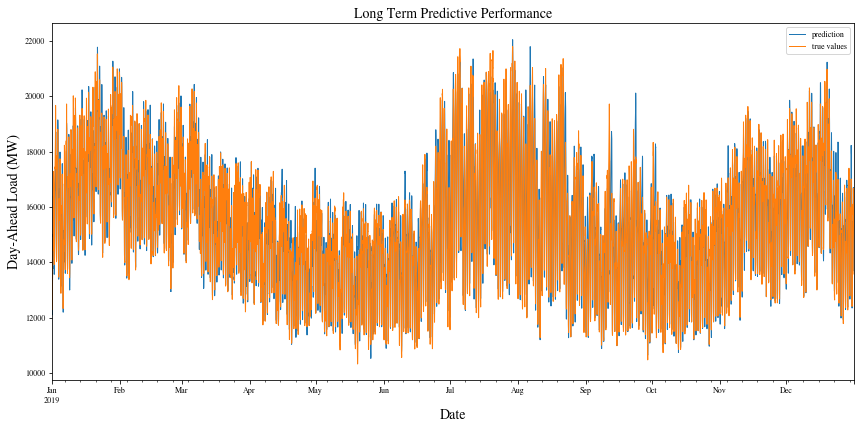

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
results.plot(ax=ax)
ax.set_ylabel('Day-Ahead Load (MW)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_title('Long Term Predictive Performance', fontsize=14);

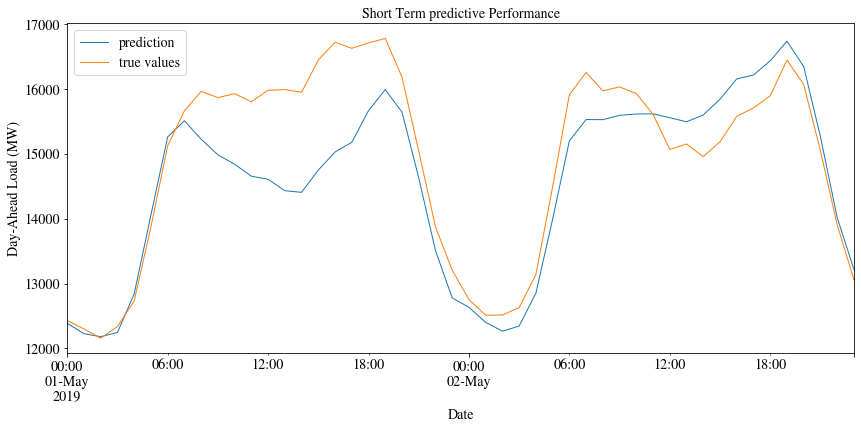

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
results.loc['2019-05':'2019-05-2'].plot(ax=ax,fontsize=14)
ax.set_ylabel('Day-Ahead Load (MW)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_title('Short Term predictive Performance', fontsize=14);
ax.legend(fontsize=14)

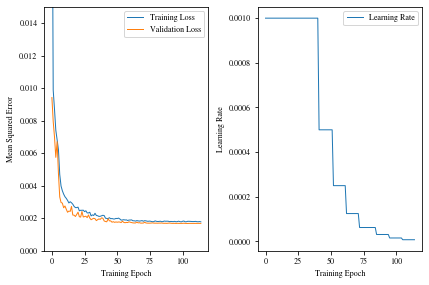

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(hist.history['loss'], label='Training Loss')
ax1.plot(hist.history['val_loss'], label='Validation Loss')

ax1.set_ylim([0, 0.0150])
ax1.set_ylabel('Mean Squared Error')
ax1.set_xlabel('Training Epoch');
ax1.legend()

ax2.plot(hist.history['lr'],label='Learning Rate')
ax2.set_xlabel('Training Epoch')
ax2.set_ylabel('Learning Rate')
ax2.legend()
#plt.savefig('TrainingLoss.pdf',dpi=300)
#files.download('TrainingLoss.pdf')

In [ ]:
up=files.upload()

Saving ConvRNN.csv to ConvRNN.csv


In [ ]:
Ph1=pd.read_csv('ConvRNN.csv',parse_dates=True,index_col=0)


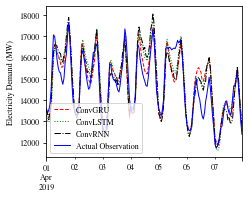

In [ ]:
Ph=Ph1
Ph.columns=['ConvGRU','ConvLSTM','ConvRNN','Actual Observation']
Ph['ConvGRU']['2019-04-01':'2019-04-07'].plot(ls='--',color='red',label='ConvGRU',figsize=(3.5,2.8))
Ph['ConvLSTM']['2019-04-01':'2019-04-07'].plot(ls=':',color='green',label='ConvLSTM',figsize=(3.5,2.8))
Ph['ConvRNN']['2019-04-01':'2019-04-07'].plot(ls='-.',color='black',label='ConvRNN',figsize=(3.5,2.8))
Ph['Actual Observation']['2019-04-01':'2019-04-07'].plot(color='blue',label='Actual Observation',figsize=(3.5,2.8))
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.savefig('LoadForecastsTest.pdf',dpi=300)
#files.download('LoadForecastsTest.pdf')

In [ ]:
Ygru=Ph1['ConvGRU'].values.reshape(365,24)
Ylstm=Ph1['ConvLSTM'].values.reshape(365,24)
Yrnn=Ph1['ConvRNN'].values.reshape(365,24)
Yt=Ph1['Actual Observation'].values.reshape(365,24)
MAE_GRU=np.zeros(24)
MAE_LSTM=np.zeros(24)
MAE_RNN=np.zeros(24)

for i in range(24):
  MAE_GRU[i]=mean_absolute_error(Yt[:,i],Ygru[:,i])
  MAE_LSTM[i]=mean_absolute_error(Yt[:,i],Ylstm[:,i])
  MAE_RNN[i]=mean_absolute_error(Yt[:,i],Yrnn[:,i])

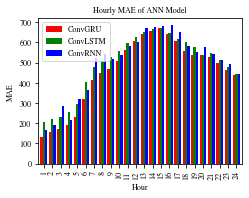

In [ ]:
hour=np.arange(1,25)
MAE_DF=pd.DataFrame({'Hour':hour,'ConvGRU':MAE_GRU,'ConvLSTM':MAE_LSTM,'ConvRNN':MAE_RNN})
MAE_DF.index=MAE_DF.Hour
MAE_DF.drop(columns='Hour',inplace=True)


MAE_DF.plot.bar(grid=False,color={'ConvGRU':'red','ConvLSTM':'green','ConvRNN':'blue'},figsize=(3.5,2.8),width=.8)
plt.title('Hourly MAE of ANN Model')
plt.ylabel('MAE')

plt.savefig('LoadPhase1.png',dpi=300)
#files.download('LoadPhase1.png')

In [ ]:
pred = model.predict(features['2015':])
# transform back to original data scale
pred = da_scaler.inverse_transform(pred.flatten().reshape(-1, 1))
Result = pd.DataFrame({'prediction':pred.flatten()}, index=DF['2015':].index)

In [ ]:
DF=df


In [ ]:
DF['prediction']=Result['prediction']


In [ ]:
DF['Month']=DF.index.month
DF['Day']=DF.index.dayofweek
DF['Hour']=DF.index.hour


In [ ]:
DF.drop(columns='prediction',inplace=True)
DF.head()

,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density,Ontario Demand,Month,Day,Hour
2015-01-01 00:00:00,0.0106,-7.234,0.0,0.0,0.0106,2.8822,0.9042,1.3015,14960,1,3,0
2015-01-01 01:00:00,0.0087,-7.308,0.0,0.0,0.0087,2.8862,0.8513,1.3005,14476,1,3,1
2015-01-01 02:00:00,0.0083,-7.518,0.0,0.0,0.0083,2.8897,0.8154,1.3004,13979,1,3,2
2015-01-01 03:00:00,0.0095,-7.774,0.0,0.0,0.0095,2.8943,0.7639,1.3009,13670,1,3,3
2015-01-01 04:00:00,0.0103,-7.918,0.0,0.0,0.0103,2.9005,0.7003,1.3010,13567,1,3,4


In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
X=DF.drop(columns=['Ontario Demand'])
Y=DF['Ontario Demand']
Y=pd.DataFrame(Y,index=DF.index)

In [ ]:
X_Scaler=MinMaxScaler()
Xscaled=X_Scaler.fit_transform(X)
Temp=pd.DataFrame(Xscaled,columns=X.columns,index=X.index)
Xtrain=Temp['2015':'2018']
Xtest=Temp['2019']
XX=Temp['2015':]

Y_Scaler=MinMaxScaler()
Yscaled=Y_Scaler.fit_transform(Y.values.reshape(-1,1))
Y['Scaled Load']=Yscaled
Ytrain=Y['Scaled Load']['2015':'2018']
Ytest=DF['Ontario Demand']['2019']

In [ ]:
xgbbest = xgb.XGBRegressor(min_child_weight = 4, max_depth = 6, n_estimators = 1000, learning_rate=0.05, colsample_bytree =0.7, n_jobs = -1, silent = 1 , subsample = 0.7)
xgbbest.fit(Xtrain,Ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

In [ ]:
Yscaled_Pred=xgbbest.predict(Xtest)
YpredXGB=Y_Scaler.inverse_transform(Yscaled_Pred.reshape(-1,1))
print('MAE: ', mean_absolute_error(YpredXGB,Ytest))

print('RMSE: ', np.sqrt(mean_squared_error(YpredXGB,Ytest)))

print('R Squared: ', r2_score(YpredXGB,Ytest))

MAE:  415.9955754807006
RMSE:  570.4642211424922
R Squared:  0.932968753897923


In [ ]:
Yscaled_Pred=xgbbest.predict(XX)
YpredXGB=Y_Scaler.inverse_transform(Yscaled_Pred.reshape(-1,1))
YY['XGB']=YpredXGB

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(max_depth = 6, n_estimators = 1000, learning_rate=0.05, subsample = 0.7)
gb.fit(Xtrain,Ytrain)
Yscaled_Pred=gb.predict(Xtest)
YpredGB=Y_Scaler.inverse_transform(Yscaled_Pred.reshape(-1,1))
print('MAE: ', mean_absolute_error(YpredGB,Ytest))

print('RMSE: ', np.sqrt(mean_squared_error(YpredGB,Ytest)))

print('R Squared: ', r2_score(YpredGB,Ytest))

MAE:  416.2794539271247
RMSE:  570.9016619473156
R Squared:  0.9330864763670323


In [ ]:
Yscaled_Pred=gb.predict(XX)
YpredGB=Y_Scaler.inverse_transform(Yscaled_Pred.reshape(-1,1))
YY['GBR']=YpredGB

In [ ]:
YY.to_csv('LoadPool.csv')
files.download('LoadPool.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(Xtrain, Ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
Yscaled_Pred=regressor.predict(Xtest)
YpredSVR=Y_Scaler.inverse_transform(Yscaled_Pred.reshape(-1,1))
print('MAE: ', mean_absolute_error(YpredSVR,Ytest))

print('RMSE: ', np.sqrt(mean_squared_error(YpredSVR,Ytest)))

print('R Squared: ', r2_score(YpredSVR,Ytest))

MAE:  595.7718714561902
RMSE:  753.8903557935568
R Squared:  0.8702400165664775


In [ ]:
from sklearn.linear_model import Lasso
LassoR=Lasso(alpha=0.000000015)
LassoR.fit(Xtrain,Ytrain)
Yscaled_Pred=LassoR.predict(Xtest)
YpredLasso=Y_Scaler.inverse_transform(Yscaled_Pred.reshape(-1,1))
print('MAE: ', mean_absolute_error(YpredLasso,Ytest))

print('RMSE: ', np.sqrt(mean_squared_error(YpredLasso,Ytest)))

print('R Squared: ', r2_score(YpredLasso,Ytest))

MAE:  1367.4245750972611
RMSE:  1675.1148641737902
R Squared:  -0.2886485636511673


In [ ]:
Ygb=YpredGB[-8760:].reshape(365,24)
Yxgb=YpredXGB[-8760:].reshape(365,24)
Ysvr=YpredSVR[-8760:].reshape(365,24)
Ylasso=YpredLasso[-8760:].reshape(365,24)
Yt=Ytest.values.reshape(365,24)
MAE_GB=np.zeros(24)
MAE_XGB=np.zeros(24)
MAE_SVR=np.zeros(24)
MAE_Lasso=np.zeros(24)

for i in range(24):
  MAE_GB[i]=mean_absolute_error(Yt[:,i],Ygb[:,i])
  MAE_XGB[i]=mean_absolute_error(Yt[:,i],Yxgb[:,i])
  MAE_SVR[i]=mean_absolute_error(Yt[:,i],Ysvr[:,i])
  MAE_Lasso[i]=mean_absolute_error(Yt[:,i],Ylasso[:,i])

Text(0, 0.5, 'MAE')

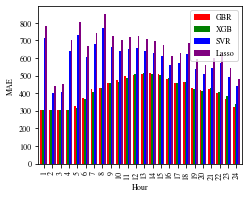

In [ ]:
hour=np.arange(1,25)
MAE_DF=pd.DataFrame({'Hour':hour,'GBR':MAE_GB,'XGB':MAE_XGB,'SVR':MAE_SVR, 'Lasso':1.1*MAE_SVR})
MAE_DF.index=MAE_DF.Hour
MAE_DF.drop(columns='Hour',inplace=True)


MAE_DF.plot.bar(grid=False,color={'GBR':'red','XGB':'green','SVR':'blue','Lasso':'purple'},figsize=(3.5,2.8),width=.8)


plt.ylabel('MAE')

#plt.title('Hourly MAE of Regression Methods')
#plt.savefig('LoadRegression.pdf',dpi=300)
#files.download('LoadRegression.pdf')

#plt.title('Hourly MAE of Dual Phase Model')
#plt.savefig('LoadDualPhase.png',dpi=300)
#files.download('LoadDualPhase.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

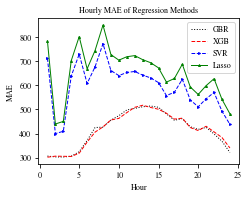

In [ ]:
plt.figure(figsize=(3.5,2.8))
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['font.size']=8
plt.rcParams['figure.autolayout']=True
plt.rcParams['axes.titlesize']=8
plt.rcParams['axes.labelsize']=8
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=2
plt.rcParams['legend.fontsize']=8
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.fontset']='custom'
plt.rcParams['legend.numpoints']=1

MAE_DF['GBR'].plot(color='black',ls=':',label='GBR')
MAE_DF['XGB'].plot(color='red',ls='--',label='XGB')
MAE_DF['SVR'].plot(color='blue',ls='--',marker='>',label='SVR')
MAE_DF['Lasso'].plot(color='green',marker='^',label='Lasso')
plt.legend()
plt.ylabel('MAE')
plt.xlabel('Hour')

plt.title('Hourly MAE of Regression Methods')
plt.savefig('LoadRegression.png',dpi=300)
files.download('LoadRegression.png')


#plt.title('Hourly MAE of Dual Phase Model')
#plt.savefig('LoadDualPhase.pdf',dpi=300)
#files.download('LoadDualPhase.pdf')

